<a href="https://colab.research.google.com/github/Jabed-Hasan/python/blob/main/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Feature Names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target Names: ['setosa' 'versicolor' 'virginica']
Target Labels: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
Data Shape: (150, 4)
Train Shape: (105, 4)
Test Shape: (45, 4)

K = 1
Accuracy: 0.9777777777777777
Confusion Matrix:
 [[19  0  0]
 [ 0 12  1]
 [ 0  0 13]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.92      0.96        13
           2       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98   

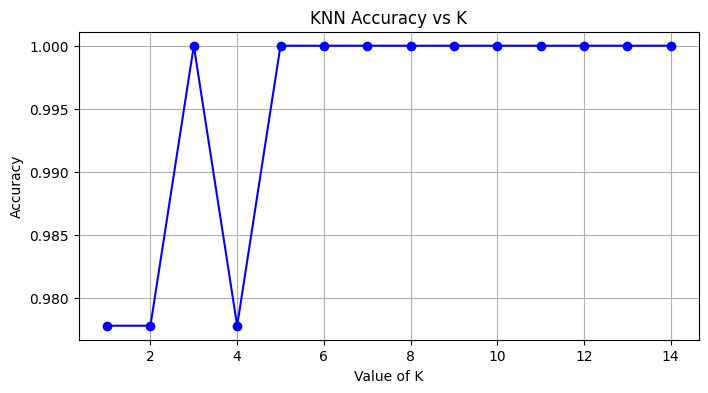


Final model trained with K = 8

Predictions on New Data:
Sample 1 → Predicted class: versicolor
Sample 2 → Predicted class: setosa


In [1]:
# Step 1: Load the Iris Dataset
from sklearn.datasets import load_iris

iris = load_iris()  # Load dataset
print("Feature Names:", iris.feature_names)
print("Target Names:", iris.target_names)
print("Target Labels:", iris.target)  # [0, 1, 2] => setosa, versicolor, virginica
print("Data Shape:", iris.data.shape)  # (150, 4) → 150 samples, 4 features

# Step 2: Split into Features (X) and Labels (y)
X = iris.data[:, :4]  # All 4 features
y = iris.target       # Target labels (0, 1, 2)

# Step 3: Split into Training and Testing Sets (70% train, 30% test)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
print("Train Shape:", X_train.shape)
print("Test Shape:", X_test.shape)

# Step 4: Feature Scaling (Standardize the data)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)  # Fit only on training data
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Step 5: Import KNeighbors Classifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics  # For accuracy, confusion matrix, classification report

# Step 6: Try K from 1 to 14 and check Accuracy, Confusion Matrix, and Report
range_k = range(1, 15)
scores = {}
scores_list = []

for k in range_k:
    classifier = KNeighborsClassifier(n_neighbors=k)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)

    acc = metrics.accuracy_score(y_test, y_pred)
    scores[k] = acc
    scores_list.append(acc)

    print(f"\nK = {k}")
    print("Accuracy:", acc)
    print("Confusion Matrix:\n", metrics.confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", metrics.classification_report(y_test, y_pred))

# Step 7: Plot Accuracy vs K
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
plt.plot(range_k, scores_list, marker='o', linestyle='-', color='blue')
plt.title('KNN Accuracy vs K')
plt.xlabel('Value of K')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

# Step 8: Choose K = 8 and Train Final Model
best_k = 8
classifier = KNeighborsClassifier(n_neighbors=best_k)
classifier.fit(X_train, y_train)
print(f"\nFinal model trained with K = {best_k}")

# Step 9: Predict New Samples
classes = {0: 'setosa', 1: 'versicolor', 2: 'virginicia'}

# New samples to predict
x_new = [[1, 1, 1, 1], [4, 3, 1.3, 0.2]]
x_new_scaled = scaler.transform(x_new)  # Always scale new data before predicting

y_predict = classifier.predict(x_new_scaled)

# Print predicted class names
print("\nPredictions on New Data:")
for i, pred in enumerate(y_predict):
    print(f"Sample {i+1} → Predicted class: {classes[pred]}")
